In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR

predictor_data_upto_2021=pd.read_excel("PredictorData2021.xlsx",sheet_name=None)                          
sheets=list(predictor_data_upto_2021.keys())
predictor_data_upto_2021 = predictor_data_upto_2021[sheets[0]]
predictor_data_upto_2021.set_index(['yyyymm'],inplace=True)
predictor_data_upto_2021.fillna(0,inplace=True)

# Imported necessary libraries, pyplot from matplotlib, numpy, pandas, and relevant functions from scikit-learn, and suppress warning messages
# Read data from an Excel file named "PredictorData2021.xlsx" into a pandas DataFrame called "predictor_data_upto_2021" while keeping the sheet names intact
# Extracted the first sheet from the Excel file and set the DataFrame's index to the 'yyyymm' column
# Filled any missing values (NaN) in the DataFrame with 0 using the fillna() method

In [ ]:
var_data=list(predictor_data_upto_2021.columns)

In [ ]:
var_names = {'dfy':'Default Yield Spread', 'infl' : 'Inflation', 'svar' : 'Stock Variance', 
             'd/e' : 'Dividend Payout ratio', 'lty' : 'Long Term Yield', 'tms' : 'Term Spread',
             'tbl' : 'Treasury-bill rate', 'dfr' : 'Default Return Spread', 
             'd/p' : 'Dividend Price Ratio', 'd/y' : 'Dividend Yield', 'ltr' : 'Long Term Return',
             'e/p' : 'Earning Price Ratio', 'b/m' : 'Book to market', 'ntis' : 'Net Equity Expansion'
            }
variables = ['dfy','infl','svar','d/e','lty','tms','tbl','dfr','d/p','d/y','ltr','e/p','b/m','ntis']
unavail = []
avail = []
Vars = {}
for var in variables:
    if var not in var_data:
        unavail.append(var)
    else:
        avail.append(var)

# Created a dictionary called 'var_names' that maps variable abbreviations to their full names and defined a list called 'variables' containing all the variable abbreviations
# Initialized two lists, 'unavail' and 'avail', as well as an empty dictionary called 'Vars' and iterated through the 'variables' list and check if each variable abbreviation exists in 'var_data'; if it does not, append it to 'unavail', otherwise append it to 'avail'       

In [ ]:
Vars['infl'] = predictor_data_upto_2021['infl'].values
Vars['svar'] = predictor_data_upto_2021['svar'].values
Vars['lty'] = predictor_data_upto_2021['lty'].values
Vars['tbl'] = predictor_data_upto_2021['tbl'].values
Vars['ltr'] = predictor_data_upto_2021['ltr'].values
Vars['b/m'] = predictor_data_upto_2021['b/m'].values
Vars['ntis'] = predictor_data_upto_2021['ntis'].values

# Assigned the 'infl' column values from the 'predictor_data_upto_2021' DataFrame to the 'infl' key in the 'Vars' dictionary
# Assigned the 'svar', 'lty', 'tbl', 'ltr', 'b/m', and 'ntis' column values from the 'predictor_data_upto_2021' DataFrame to their corresponding keys in the 'Vars' dictionary
# The 'Vars' dictionary holds the data for each of these variables, making it easier to access and manipulate them in the subsequent analysis
# This step helps in organizing and structuring the data for further processing in the model development phase

In [ ]:
dfy = predictor_data_upto_2021['BAA'] - predictor_data_upto_2021['AAA']
Vars['dfy'] = dfy.fillna(0).values

d_e = np.log(predictor_data_upto_2021['D12'])-np.log(predictor_data_upto_2021['E12'])
Vars['d/e'] = d_e.fillna(0).values

tms = predictor_data_upto_2021['lty'] - predictor_data_upto_2021['tbl']
Vars['tms'] = tms.fillna(0).values

dfr = predictor_data_upto_2021['corpr'] - predictor_data_upto_2021['lty']
Vars['dfr'] = dfr.fillna(0).values

d_p = np.log(predictor_data_upto_2021['D12']) - np.log(predictor_data_upto_2021['Index'])
Vars['d/p'] = d_p.fillna(0).values

d_y = np.log(predictor_data_upto_2021['D12']) - np.log(predictor_data_upto_2021['Index']).shift(1)
Vars['d/y'] = d_y.fillna(0).values

e_p = np.log(predictor_data_upto_2021['E12'])-np.log(predictor_data_upto_2021['Index'])
Vars['e/p'] = e_p.fillna(0).values

Equity_Premium = predictor_data_upto_2021['CRSP_SPvw'] - predictor_data_upto_2021['Rfree']
Vars['Equity Premium'] = Equity_Premium.fillna(0).values

# Calculated additional variables such as 'dfy', 'd/e', 'tms', 'dfr', 'd/p', 'd/y', and 'e/p' using the available columns in the 'predictor_data_upto_2021' DataFrame, then store the filled values in the 'Vars' dictionary
# For each variable, missing values were filled with zeros using the 'fillna(0)' method. Calculated the 'Equity Premium' by subtracting the 'Rfree' column from the 'CRSP_SPvw' column in the 'predictor_data_upto_2021' DataFrame.
# Add the 'Equity Premium' to the 'Vars' dictionary, filling any missing values with zeros

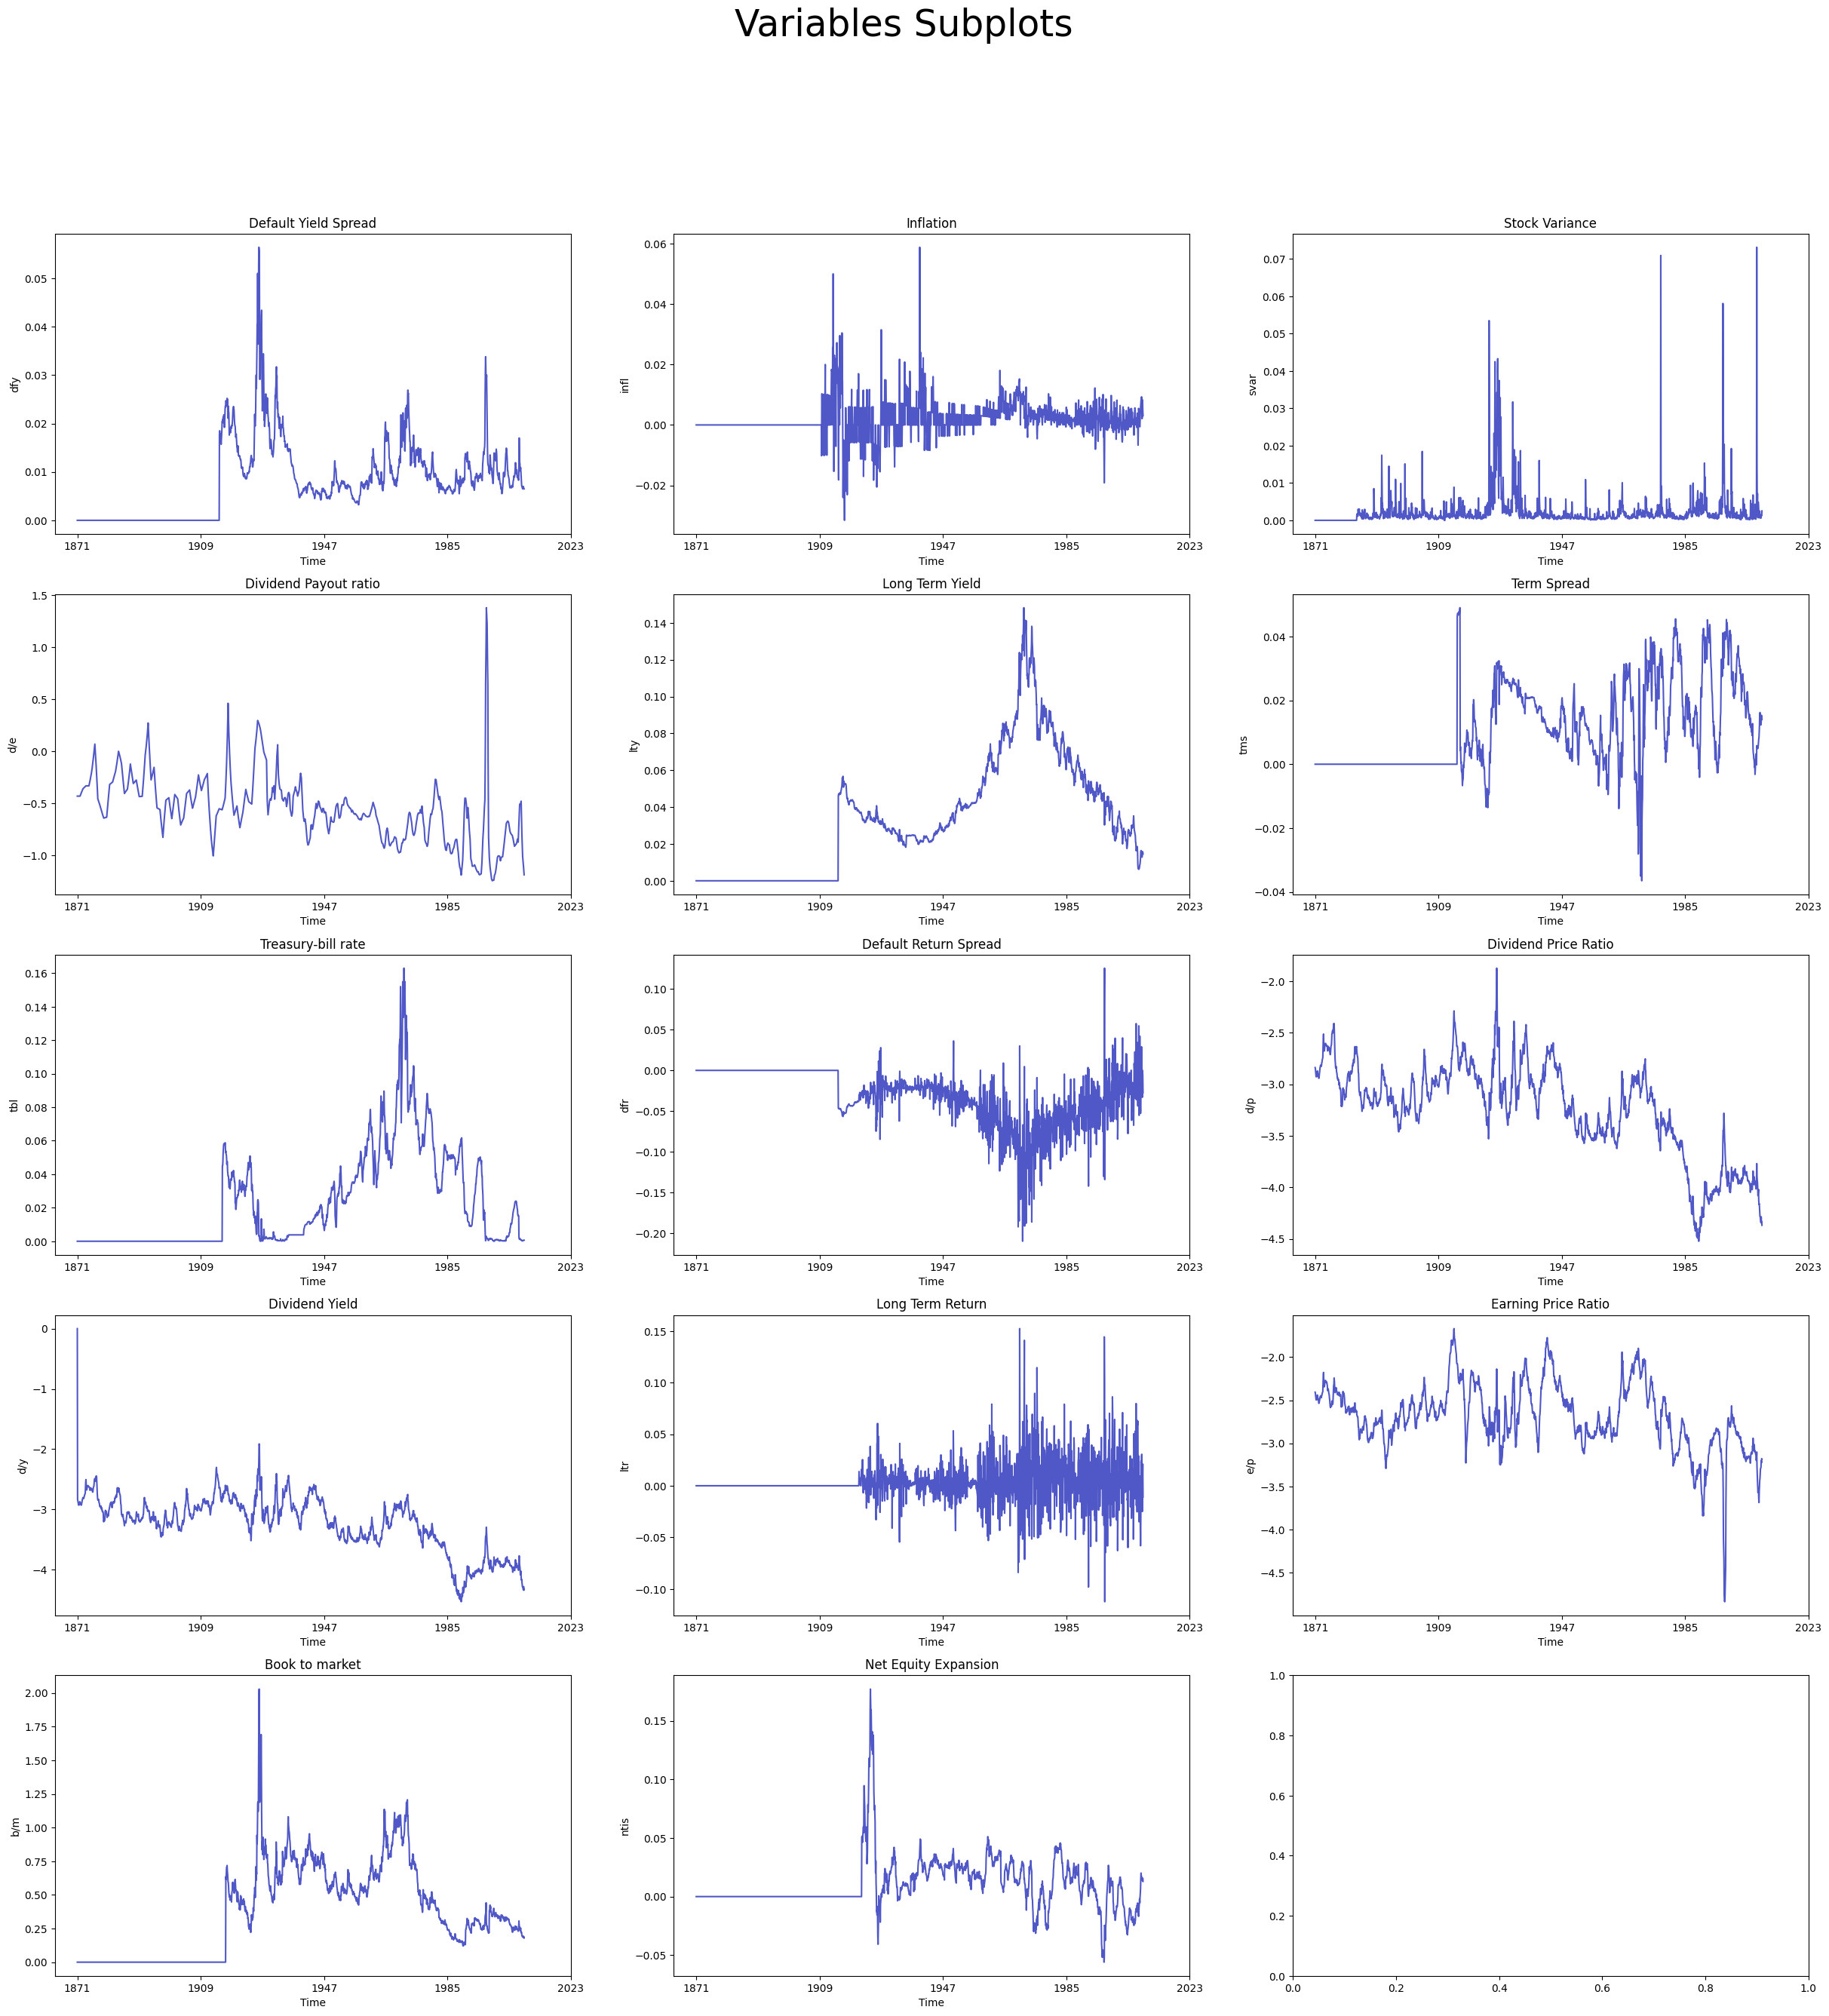

In [ ]:
color = plt.cm.tab20(np.linspace(0,1,30))
fig, axs = plt.subplots(5,3,figsize=(30,30))
plt.suptitle("Variables Subplots" , size = 35)
iter = 0
for i in range(5):
    for j in range(3):
        if iter==14:    
            break
        else:
            axs[i,j].plot(range(1812),Vars[variables[iter]], color= '#5057C6'  , label = variables[iter])
            axs[i,j].set_xlabel('Time')
            axs[i,j].set_ylabel(variables[iter])
            axs[i,j].set_title(var_names[variables[iter]])
            axs[i,j].set_xticks([500*n for n in range(5)])
            axs[i,j].set_xticklabels([1871+38*n for n in range(5)])
            iter+=1

# Created a 5x3 grid of subplots using Matplotlib with a figure size of 30x30 and a main title "Variables Subplots"
# Iterated through each of the 5 rows and 3 columns of subplots, plotting the values of the 14 variables in the 'Vars' dictionary over time, using a blue color
# For each subplot, set the x-axis label to 'Time', the y-axis label to the corresponding variable, and the subplot title to the corresponding variable name from the 'var_names' dictionary
# Configured the x-axis ticks and tick labels to display the years 1871, 1909, 1947, 1985, and 2023, corresponding to evenly spaced time intervals          

In [ ]:
# predictor_data_upto_2021

#build train data
predictor_data_upto_2021.loc[:196412]

X = pd.DataFrame(Vars, index = predictor_data_upto_2021.index).drop(columns = ['Equity Premium'])
y = pd.DataFrame({'Equity Premium' : Equity_Premium.fillna(0).values}, index = X.index)

In [ ]:
indices = y.loc[196501:200812].index
y_OOS_pred = []
y_mean_pred = []
r2 = []
rmse = []
mae = []
for index in indices:
    X_train = X.loc[:index].values
    y_train = y.loc[:index].values
    X_test = X.loc[index].values.reshape(1,-1)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_mean_pred.append(np.mean(y_train))
    y_OOS_pred.append(model.predict(X_test))

y_OOS_pred = np.array(y_OOS_pred).reshape(-1,1)
y_test = y.loc[indices]
mse_a = mean_squared_error(y_test,y_OOS_pred)
mse_n = mean_squared_error(y_test,y_mean_pred)
r2 = 1 - (mse_a/mse_n)
rmse = mse_n**0.5 - mse_a**0.5
mae = mean_absolute_error(y_test,y_OOS_pred)
Params = pd.DataFrame({'R2 SCORE': r2, 'RMSE SCORE' : rmse, 'MAE' : mae},index=['January 1965 to December 2008'])

# Iterated through the indices of the dataset from January 1965 to December 2008, training a linear regression model on the data up to each index and predicting the out-of-sample (OOS) value for that index.
# Calculated the mean prediction for the training data and store it in 'y_mean_pred', and store the OOS predictions in 'y_OOS_pred'.
# Computed the mean squared error (MSE) for the OOS predictions and the mean predictions, and calculated the R2 score using the ratio of the MSEs.
# Calculated the root mean squared error (RMSE) and mean absolute error (MAE) for the OOS predictions, and stored these performance metrics in a DataFrame named 'Params'.

In [ ]:
indices = y.loc[197601:200812].index
y_OOS_pred = []
y_mean_pred = []
r2 = []
rmse = []
mae = []
for index in indices:
    X_train = X.loc[:index].values
    y_train = y.loc[:index].values
    X_test = X.loc[index].values.reshape(1,-1)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_mean_pred.append(np.mean(y_train))
    y_OOS_pred.append(model.predict(X_test))

y_OOS_pred = np.array(y_OOS_pred).reshape(-1,1)
y_test = y.loc[indices]
mse_a = mean_squared_error(y_test,y_OOS_pred)
mse_n = mean_squared_error(y_test,y_mean_pred)
r2 = 1 - (mse_a/mse_n)
rmse = mse_n**0.5 - mse_a**0.5
mae = mean_absolute_error(y_test,y_OOS_pred)
Params.loc[len(Params)] = [r2, rmse, mae]

indices = y.loc[200001:200812].index
y_OOS_pred = []
y_mean_pred = []
r2 = []
rmse = []
mae = []
for index in indices:
    X_train = X.loc[:index].values
    y_train = y.loc[:index].values
    X_test = X.loc[index].values.reshape(1,-1)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_mean_pred.append(np.mean(y_train))
    y_OOS_pred.append(model.predict(X_test))

y_OOS_pred = np.array(y_OOS_pred).reshape(-1,1)
y_test = y.loc[indices]
mse_a = mean_squared_error(y_test,y_OOS_pred)
mse_n = mean_squared_error(y_test,y_mean_pred)
r2 = 1 - (mse_a/mse_n)
rmse = mse_n**0.5 - mse_a**0.5
mae = mean_absolute_error(y_test,y_OOS_pred)
Params.loc[len(Params)] = [r2, rmse, mae]

# Repeated the process from the previous code snippet for two different time periods: January 1976 to December 2008, and January 2000 to December 2008.
# For each time period, trained a linear regression model on the data up to each index and predictd the out-of-sample (OOS) value for that index.
# Computed the mean squared error (MSE) for the OOS predictions and the mean predictions, and calculated the R2 score using the ratio of the MSEs.
# Calculated the root mean squared error (RMSE) and mean absolute error (MAE) for the OOS predictions, and appended these performance metrics to the existing 'Params' DataFrame.

In [ ]:
Params.index=['January 1965 to December 2008','January 1976 to December 2008','January 2000 to December 2008']
print(Params)

                               R2 SCORE  RMSE SCORE       MAE
January 1965 to December 2008  0.487443    0.012367  0.023779
January 1976 to December 2008  0.471749    0.011872  0.024166
January 2000 to December 2008  0.320116    0.007743  0.027870


## SVR

## January 1965 to December 2008

In [ ]:
indices = y.loc[196501:200812].index
y_OOS_pred = []
y_mean_pred = []
r2 = []
rmse = []
mae = []
for index in indices:
    X_train = X.loc[:index].values
    y_train = y.loc[:index].values
    X_test = X.loc[index].values.reshape(1,-1)
    model = SVR(kernel='rbf', C=1e3, gamma=0.1)
    model.fit(X_train,y_train)
    y_mean_pred.append(np.mean(y_train))
    y_OOS_pred.append(model.predict(X_test))

y_OOS_pred = np.array(y_OOS_pred).reshape(-1,1)
y_test = y.loc[indices]
mse_a = mean_squared_error(y_test,y_OOS_pred)
mse_n = mean_squared_error(y_test,y_mean_pred)
r2 = 1 - (mse_a/mse_n)
print(f"R2 Value is {r2}")
rmse = mse_n**0.5 - mse_a**0.5
print(f"RMSE Value is {rmse}")
mae = mean_absolute_error(y_test,y_OOS_pred)
print(f"MAE Value is {mae}")
Params2 = pd.DataFrame({'R2 SCORE': r2, 'RMSE SCORE' : rmse, 'MAE' : mae},index=['January 1965 to December 2008 Using Gradient Boosting']) 

# For the time period January 1965 to December 2008, trained a SVR model with a radial basis function (RBF) kernel, C=1e3, and gamma=0.1 on the data up to each index and predict the out-of-sample (OOS) value for that index.
# Computed the mean squared error (MSE) for the OOS predictions and the mean predictions, and calculate the R2 score using the ratio of the MSEs.
# Calculated the root mean squared error (RMSE) and mean absolute error (MAE) for the OOS predictions.
# Stored these performance metrics in a new DataFrame 'Params2' with an index label indicating that the results are for the time period January 1965 to December 2008 using SVR with RBF kernel.


R2 Value is 0.4428415911018717
RMSE Value is 0.011038895712443493
MAE Value is 0.02371042250473896


## January 1976 to December 2008

In [ ]:
from sklearn.svm import SVR
indices = y.loc[197601:200812].index
y_OOS_pred = []
y_mean_pred = []
r2 = []
rmse = []
mae = []
for index in indices:
    X_train = X.loc[:index].values
    y_train = y.loc[:index].values
    X_test = X.loc[index].values.reshape(1,-1)
    model = SVR(kernel='rbf', C=1e3, gamma=0.1)
    model.fit(X_train,y_train)
    y_mean_pred.append(np.mean(y_train))
    y_OOS_pred.append(model.predict(X_test))

y_OOS_pred = np.array(y_OOS_pred).reshape(-1,1)
y_test = y.loc[indices]
mse_a = mean_squared_error(y_test,y_OOS_pred)
mse_n = mean_squared_error(y_test,y_mean_pred)
r2 = 1 - (mse_a/mse_n)
print(f"R2 Value is {r2}")
rmse = mse_n**0.5 - mse_a**0.5
print(f"RMSE Value is {rmse}")
mae = mean_absolute_error(y_test,y_OOS_pred)
print(f"MAE Value is {mae}")
Params2 = pd.DataFrame({'R2 SCORE': r2, 'RMSE SCORE' : rmse, 'MAE' : mae},index=['January 1965 to December 2008 Using Gradient Boosting']) 


R2 Value is 0.33412940280775083
RMSE Value is 0.007995858026953448
MAE Value is 0.026388959794601007


## January 2000 to December 2008

In [ ]:
from sklearn.svm import SVR
indices = y.loc[200001:200812].index
y_OOS_pred = []
y_mean_pred = []
r2 = []
rmse = []
mae = []
for index in indices:
    X_train = X.loc[:index].values
    y_train = y.loc[:index].values
    X_test = X.loc[index].values.reshape(1,-1)
    model = SVR(kernel='rbf', C=1e3, gamma=0.1)
    model.fit(X_train,y_train)
    y_mean_pred.append(np.mean(y_train))
    y_OOS_pred.append(model.predict(X_test))

y_OOS_pred = np.array(y_OOS_pred).reshape(-1,1)
y_test = y.loc[indices]
mse_a = mean_squared_error(y_test,y_OOS_pred)
mse_n = mean_squared_error(y_test,y_mean_pred)
r2 = 1 - (mse_a/mse_n)
print(f"R2 Value is {r2}")
rmse = mse_n**0.5 - mse_a**0.5
print(f"RMSE Value is {rmse}")
mae = mean_absolute_error(y_test,y_OOS_pred)
print(f"MAE Value is {mae}")
Params2 = pd.DataFrame({'R2 SCORE': r2, 'RMSE SCORE' : rmse, 'MAE' : mae},index=['January 1965 to December 2008 Using Gradient Boosting']) 


R2 Value is 0.41544409187913767
RMSE Value is 0.010390805573187181
MAE Value is 0.026999176212391392


## Gradient Boosting

## January 1965 to December 2008

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
indices = y.loc[196501:200812].index
y_OOS_pred = []
y_mean_pred = []
r2 = []
rmse = []
mae = []
for index in indices:
    X_train = X.loc[:index].values
    y_train = y.loc[:index].values
    X_test = X.loc[index].values.reshape(1,-1)
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train,y_train)
    y_mean_pred.append(np.mean(y_train))
    y_OOS_pred.append(model.predict(X_test))

y_OOS_pred = np.array(y_OOS_pred).reshape(-1,1)
y_test = y.loc[indices]
mse_a = mean_squared_error(y_test,y_OOS_pred)
mse_n = mean_squared_error(y_test,y_mean_pred)
r2 = 1 - (mse_a/mse_n)
print(f"R2 Value is {r2}")
rmse = mse_n**0.5 - mse_a**0.5
print(f"RMSE Value is {rmse}")
mae = mean_absolute_error(y_test,y_OOS_pred)
print(f"MAE Value is {mae}")
Params2.loc[len(Params2)] = [r2, rmse, mae]

R2 Value is 0.7769946441904152
RMSE Value is 0.022975743658700695
MAE Value is 0.016418134584431632


## January 1976 to December 2008

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
indices = y.loc[197601:200812].index
y_OOS_pred = []
y_mean_pred = []
r2 = []
rmse = []
mae = []
for index in indices:
    X_train = X.loc[:index].values
    y_train = y.loc[:index].values
    X_test = X.loc[index].values.reshape(1,-1)
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train,y_train)
    y_mean_pred.append(np.mean(y_train))
    y_OOS_pred.append(model.predict(X_test))

y_OOS_pred = np.array(y_OOS_pred).reshape(-1,1)
y_test = y.loc[indices]
mse_a = mean_squared_error(y_test,y_OOS_pred)
mse_n = mean_squared_error(y_test,y_mean_pred)
r2 = 1 - (mse_a/mse_n)
print(f"R2 Value is {r2}")
rmse = mse_n**0.5 - mse_a**0.5
print(f"RMSE Value is {rmse}")
mae = mean_absolute_error(y_test,y_OOS_pred)
print(f"MAE Value is {mae}")
Params2.loc[len(Params2)] = [r2, rmse, mae]

R2 Value is 0.7612387158534729
RMSE Value is 0.02222295796282649
MAE Value is 0.017119698937142113


## January 2000 to December 2008

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
indices = y.loc[200001:200812].index
y_OOS_pred = []
y_mean_pred = []
r2 = []
rmse = []
mae = []
for index in indices:
    X_train = X.loc[:index].values
    y_train = y.loc[:index].values
    X_test = X.loc[index].values.reshape(1,-1)
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train,y_train)
    y_mean_pred.append(np.mean(y_train))
    y_OOS_pred.append(model.predict(X_test))

y_OOS_pred = np.array(y_OOS_pred).reshape(-1,1)
y_test = y.loc[indices]
mse_a = mean_squared_error(y_test,y_OOS_pred)
mse_n = mean_squared_error(y_test,y_mean_pred)
r2 = 1 - (mse_a/mse_n)
print(f"R2 Value is {r2}")
rmse = mse_n**0.5 - mse_a**0.5
print(f"RMSE Value is {rmse}")
mae = mean_absolute_error(y_test,y_OOS_pred)
print(f"MAE Value is {mae}")
Params2.loc[len(Params2)] = [r2, rmse, mae]

R2 Value is 0.6733520482430027
RMSE Value is 0.01891005796860058
MAE Value is 0.020037089011759115
